#Importing the libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing the dataset

In [20]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [21]:
print(x)
print(y)
y = y.reshape(len(y), 1)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


#Feature Scaling

In [22]:
print(y)
#in SVR model there is not this explicit equation of the dependent variable with respect to the features and mostly there are not those coefficients multiplying each of the features and therefore not compensating with lower values for the features taking high values
#train test split is not done in this scenario in order to leverage the maximum data in order to learn the correlations between the business levels and the salaries

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [23]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
#two diffferent StandardScaler() is required because the mean & standard deviation will be different for both x & y
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)
print(x)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


#Training the SVR model on the whole dataset

In [24]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') #Gaussian Radial Basis Function (rbf)
regressor.fit(x, y)

C:\Users\sspra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

#Prediciting a new result

In [25]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]]))) #to transform it to the form similar to feature scaling x & y which helps to get correct output

array([170370.0204065])

#Visualising the SVR results

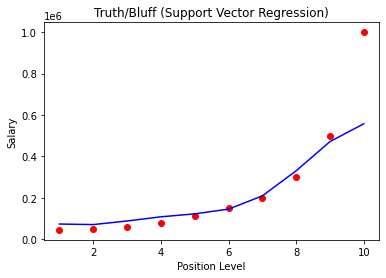

In [27]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red') #real salaries
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color = 'blue') #real salary & predicted salary
#predicted value to be converted to the original format hence the inverse_transform; else it will return the prediction in the same scale as the one that was used in the training
plt.title('Truth/Bluff (Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

#Visualising the SVR results (for higher resolution & smoother curve)

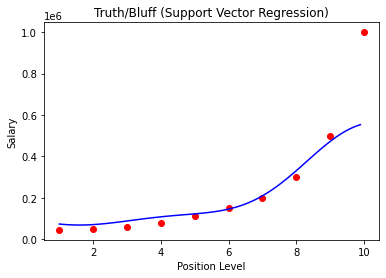

In [28]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1) #start & end with 0.1 interval
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red') #real salaries
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))), color = 'blue') #real salary & predicted salary
plt.title('Truth/Bluff (Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()